In [11]:
import scipy.io
from scipy.sparse import coo_matrix
import pandas as pd
import matplotlib.pyplot as plt
import time
import cv2
import numpy as np


In [12]:
peakdata = scipy.io.loadmat('peakdata.mat', squeeze_me=True)
peakdata = peakdata['data']


(array([1.1840302e+07, 2.6265720e+06, 4.1053800e+05, 1.3341400e+05,
        6.1991000e+04, 3.4165000e+04, 1.8798000e+04, 1.2472000e+04,
        9.3550000e+03, 7.5130000e+03, 4.9030000e+03, 4.0680000e+03,
        3.3370000e+03, 2.2940000e+03, 1.3060000e+03, 1.2300000e+03,
        9.7400000e+02, 6.0100000e+02, 4.2700000e+02, 4.1500000e+02,
        3.1500000e+02, 2.7300000e+02, 2.0200000e+02, 1.3900000e+02,
        9.8000000e+01, 8.8000000e+01, 7.3000000e+01, 6.1000000e+01,
        6.7000000e+01, 1.0300000e+02, 6.5000000e+01, 5.2000000e+01,
        1.0000000e+01, 1.5000000e+01, 1.1000000e+01, 1.1000000e+01,
        1.4000000e+01, 8.0000000e+00, 1.2000000e+01, 1.4000000e+01,
        1.1000000e+01, 9.0000000e+00, 1.1000000e+01, 1.1000000e+01,
        8.0000000e+00, 1.2000000e+01, 5.0000000e+00, 5.0000000e+00,
        3.0000000e+00, 1.3000000e+01]),
 array([  4.64160359,   8.16710108,  11.69259857,  15.21809606,
         18.74359355,  22.26909104,  25.79458852,  29.32008601,
         32.8455

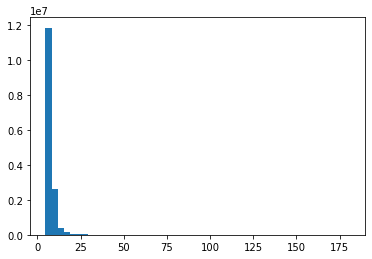

In [13]:
plt.hist((peakdata['int'].item()**(1/3)), bins=50)

In [14]:
mzscale = 1
rtscale = 1
intscale = 1/3
mzs = peakdata['mz'].item()*mzscale
rts = peakdata['rt'].item()*rtscale
ints = peakdata['int'].item()**(intscale)
indices = peakdata['peak_index'].item()


In [15]:
print("Number of 'scans':", len(indices))
print("Number of unique peaks:",len(np.unique(indices)))
print("Number of scans containing peaks:",sum(indices != 0))

Number of 'scans': 15176394
Number of unique peaks: 4209
Number of scans containing peaks: 139650


In [16]:
ii_list = []
dist_mz = 5
dist_rt = 5
mzH = int(np.ceil(np.max(mzs)))
mzL = int(np.floor(np.min(mzs)))
rtH = np.ceil(np.max(rts)*100)/100
rtL = np.floor(np.min(rts)*100)/100
mz_overlap = 2
rt_overlap = 0.15
mzscale = 1e4
rt_range = np.linspace(rtL, rtH, int((rtH - rtL)/dist_rt)).tolist()
print(len(rt_range), len(range(mzL, mzH, dist_mz)))
for mz in range(mzL, mzH, dist_mz):
    i_mzs = np.where((mzs > mz) & (mzs < (mz + dist_mz + mz_overlap)))[0].tolist()
    t = time.time()
    for rt in rt_range[:-1]:
        i_rts = np.where((rts > rt) & (rts < (rt + dist_rt + rt_overlap)))[0].tolist()
        ii = list(set(i_mzs).intersection(i_rts))
        # mzs_int = (np.rint(mzs[ii]*mzscale) - np.rint(np.min(mzs[ii])*mzscale)).astype(int)
        # rts_int = (np.rint((rts[ii] - np.min(rts[ii]))/np.mean(np.diff(np.unique(rts[ii]))))).astype(int)
        # print(len(rts_int), len(mzs_int))
        # mat = coo_matrix((ints[ii], (mzs_int, rts_int))).toarray()
        # print(np.min(mzs_int), len(np.unique(mzs_int)), np.min(rts_int), len(np.unique(rts_int)))
        # if (indices[ii] != 0).any():
        #     print(np.unique(indices[ii]), 'Theres a peak')
        # else:
            # print(np.unique(indices[ii]))
        ii_list.append(ii)

2 327


In [17]:
ii = ii_list[10]
mzs_int = (np.rint(mzs[ii]*mzscale) - np.rint(np.min(mzs[ii])*mzscale)).astype(int)
rts_int = (np.rint((rts[ii] - np.min(rts[ii]))/np.mean(np.diff(np.unique(rts[ii]))))).astype(int)
print('Scans:', len(rts_int), len(mzs_int))
mat = coo_matrix((ints[ii], (mzs_int, rts_int))).toarray()
int_ind = [int(item) for item in indices[ii] != 0]
ind_mat = coo_matrix((int_ind, (mzs_int, rts_int))).toarray()
print('Unique m/z:', len(np.unique(mzs_int)), '\nUnique times', len(np.unique(rts_int)))
if (indices[ii] != 0).any():
    print(np.unique(indices[ii]), f"\nThere's {len(np.unique(indices[ii]))} peak(s)")
else:
    print(np.unique(indices[ii]))
# ii_list.append(ii)

Scans: 96202 96202
Unique m/z: 44056 
Unique times 1239
[   0    1   71  221  352  353  390  494  525  526  527  563  808 1138
 1401 1606 1607 1704 2033 2380 2648 3119 3458 3490] 
There's 24 peak(s)


In [18]:
mat.shape

(69998, 1239)

Text(0.5, 1.0, 'Annotated peaks')

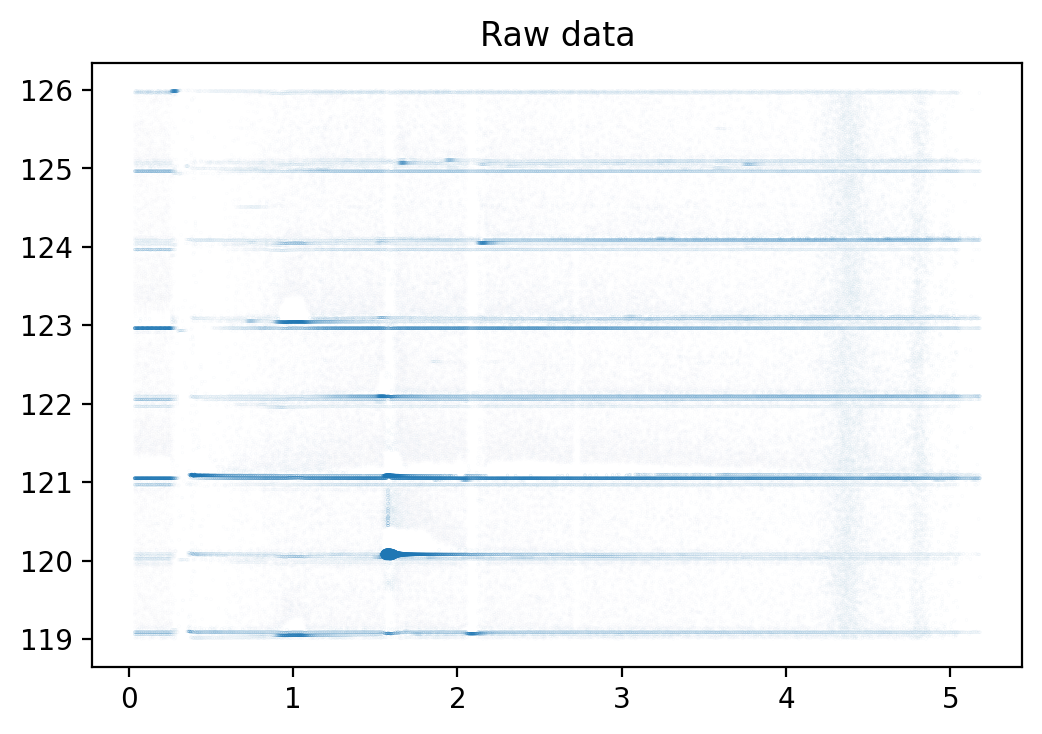

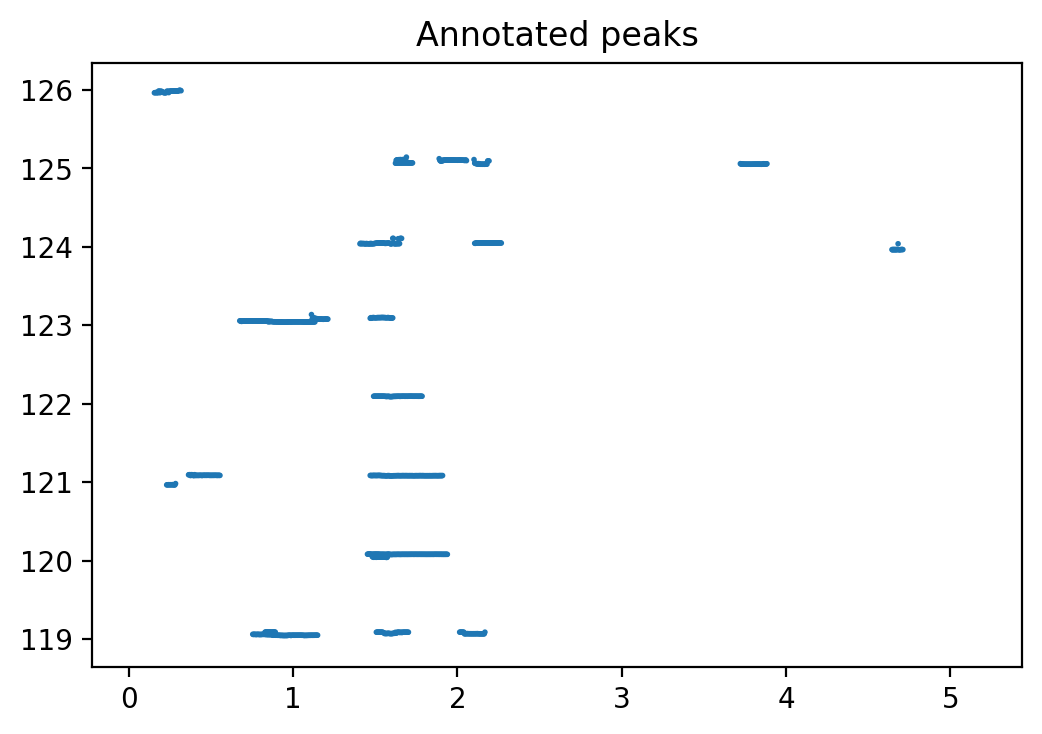

In [19]:
fig, ax = plt.subplots()
fig.set_dpi(200)
plt.scatter(rts[ii], mzs[ii], s=(0.01*ints[ii])**4)
ax.set_title('Raw data')
fig, ax = plt.subplots()
fig.set_dpi(200)
plt.scatter(rts[ii], mzs[ii], s=int_ind)
ax.set_title('Annotated peaks')

180.9164780548072 180.9164780548072


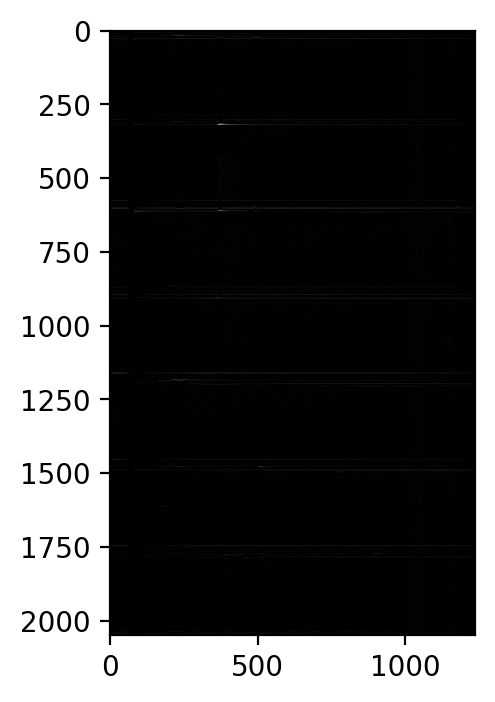

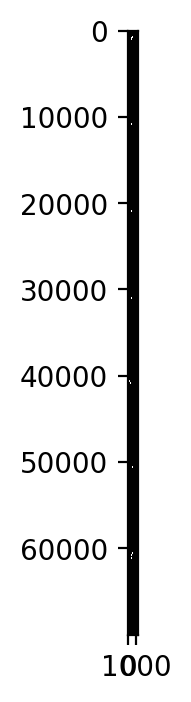

In [20]:
old_mat = mat

new_mat = cv2.resize(mat, (1239, 2048), interpolation=cv2.INTER_AREA)
scale = (1/np.max(new_mat))
print(np.max(mat), np.max(ints[ii]))
plt.figure(dpi=200)
plt.imshow(new_mat, cmap='gray', vmin=0, vmax=2)
sbefore = np.sum(mat)
mat[mat < (np.mean(mat) + np.std(mat))] = 0
safter = np.sum(mat)
np.mean(new_mat)
ind_new_mat = cv2.resize(np.array(ind_mat, dtype = 'uint8'), (1239,2048), interpolation=cv2.INTER_AREA)
plt.figure(dpi=200)
plt.imshow(ind_mat, cmap='gray', vmin=0, vmax=0.0001)

In [21]:
np.unique(np.diff(np.unique(mzs[ii])))
np.min(mzs[ii])
mzs_int
len(rts_int)
mzs_int
# np.shape(coo_matrix((ints[ii], (mzs_int, rts_int))).toarray())

array([ 1423,  1636,  1912, ..., 60689,   600,   895])